#Data Preprocessing

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('/content/datasets_4458_8204_winequality-red.csv')

In [9]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
data.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Text(0, 0.5, 'alcohol')

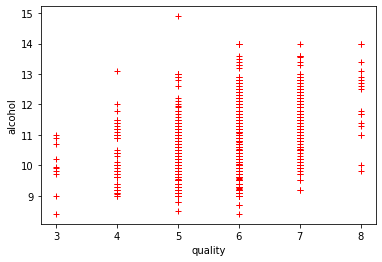

In [10]:
plt.plot(data['quality'], data['alcohol'], 'r+')
plt.xlabel('quality')
plt.ylabel('alcohol')

#Separate Features and Target

* Here lets considering 'quality' as target
*  and rest of the columns as features

In [14]:
x = data.iloc[:,:-1].values
y = data.iloc[:, -1].values

In [15]:
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [16]:
y

array([5, 5, 5, ..., 6, 5, 6])

#Splitting Data into Train and Test sets

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
x_train

array([[10.2  ,  0.67 ,  0.39 , ...,  3.17 ,  0.47 , 10.   ],
       [ 7.6  ,  0.735,  0.02 , ...,  3.51 ,  0.71 , 11.7  ],
       [ 9.1  ,  0.68 ,  0.11 , ...,  3.31 ,  0.55 ,  9.5  ],
       ...,
       [ 7.7  ,  0.915,  0.12 , ...,  3.35 ,  0.65 , 10.2  ],
       [ 9.6  ,  0.6  ,  0.5  , ...,  3.5  ,  0.57 ,  9.7  ],
       [ 8.4  ,  0.745,  0.11 , ...,  3.19 ,  0.82 ,  9.6  ]])

In [ ]:
y_train

array([5, 4, 5, ..., 5, 6, 5])

In [ ]:
y_test

array([6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 7, 6, 6, 5, 5, 4, 6, 6, 6, 5, 6, 5,
       6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 8, 6, 5, 7, 5, 6, 6, 6, 5, 6,
       5, 7, 7, 5, 5, 5, 5, 4, 5, 5, 5, 8, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5,
       5, 6, 5, 5, 6, 6, 5, 5, 5, 7, 6, 6, 5, 6, 6, 5, 8, 4, 5, 7, 5, 5,
       6, 7, 6, 6, 7, 6, 6, 5, 5, 5, 5, 7, 6, 6, 7, 6, 6, 5, 3, 6, 7, 3,
       5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 7, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5,
       6, 5, 5, 5, 5, 6, 5, 6, 4, 6, 5, 6, 6, 6, 6, 6, 7, 6, 7, 6, 6, 6,
       6, 5, 6, 7, 6, 7, 4, 7, 6, 5, 6, 6, 5, 5, 5, 7, 6, 6, 5, 6, 5, 5,
       6, 3, 4, 5, 5, 6, 7, 6, 6, 5, 4, 5, 5, 4, 7, 5, 5, 5, 5, 6, 6, 6,
       5, 5, 6, 5, 5, 4, 5, 5, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 7, 5,
       5, 6, 5, 5, 5, 5, 6, 6, 7, 7, 6, 7, 7, 6, 5, 6, 6, 8, 5, 5, 7, 6,
       5, 8, 7, 6, 6, 6, 6, 6, 6, 5, 5, 4, 6, 6, 5, 7, 7, 6, 5, 6, 6, 6,
       5, 5, 5, 5, 5, 6, 5, 6, 7, 5, 7, 5, 5, 6, 5, 6, 6, 5, 4, 6, 6, 5,
       5, 5, 7, 5, 5, 5, 6, 5, 7, 5, 5, 6, 6, 6, 7,

In [ ]:
x_train

array([[1.13e+01, 3.70e-01, 5.00e-01, ..., 3.15e+00, 5.70e-01, 1.05e+01],
       [6.50e+00, 5.80e-01, 0.00e+00, ..., 3.62e+00, 6.20e-01, 1.15e+01],
       [1.35e+01, 5.30e-01, 7.90e-01, ..., 3.18e+00, 7.70e-01, 1.30e+01],
       ...,
       [6.90e+00, 5.80e-01, 1.00e-02, ..., 3.40e+00, 7.30e-01, 9.70e+00],
       [7.80e+00, 5.20e-01, 2.50e-01, ..., 3.43e+00, 6.50e-01, 9.00e+00],
       [8.80e+00, 4.10e-01, 6.40e-01, ..., 3.54e+00, 6.60e-01, 1.05e+01]])

#Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ntrain = y_train.reshape(len(y_train), 1)
ntest = y_test.reshape(len(y_test), 1)

In [ ]:
ntrain

array([[5],
       [4],
       [5],
       ...,
       [5],
       [6],
       [5]])

In [ ]:

ntest

array([[6],
       [5],
       [6],
       [6],
       [5],
       [6],
       [5],
       [5],
       [6],
       [6],
       [7],
       [6],
       [6],
       [5],
       [5],
       [4],
       [6],
       [6],
       [6],
       [5],
       [6],
       [5],
       [6],
       [6],
       [5],
       [5],
       [6],
       [6],
       [6],
       [6],
       [5],
       [6],
       [5],
       [5],
       [8],
       [6],
       [5],
       [7],
       [5],
       [6],
       [6],
       [6],
       [5],
       [6],
       [5],
       [7],
       [7],
       [5],
       [5],
       [5],
       [5],
       [4],
       [5],
       [5],
       [5],
       [8],
       [6],
       [6],
       [5],
       [6],
       [5],
       [6],
       [5],
       [5],
       [5],
       [5],
       [5],
       [6],
       [5],
       [5],
       [6],
       [6],
       [5],
       [5],
       [5],
       [7],
       [6],
       [6],
       [5],
       [6],
       [6],
       [5],
       [8],
    

In [ ]:
x_sc = StandardScaler()
y_sc = StandardScaler()

In [ ]:
xn_train = x_sc.fit_transform(x_train)
yn_train = y_sc.fit_transform(ntrain)

In [ ]:
xn_test = x_sc.transform(x_test)
yn_test = y_sc.transform(ntest)

In [ ]:
len(xn_train)

1279

In [ ]:
xn_train

array([[ 1.67973650e+00, -8.75488918e-01,  1.14919409e+00, ...,
        -1.04280905e+00, -5.19977019e-01,  6.11460755e-02],
       [-1.04872979e+00,  3.12215042e-01, -1.40523630e+00, ...,
         2.02884817e+00, -2.32424871e-01,  9.95318848e-01],
       [ 2.93028355e+00,  2.94283847e-02,  2.63076372e+00, ...,
        -8.46745826e-01,  6.30231573e-01,  2.39657801e+00],
       ...,
       [-8.21357595e-01,  3.12215042e-01, -1.35414769e+00, ...,
         5.91051172e-01,  4.00189854e-01, -6.86192142e-01],
       [-3.09770166e-01, -2.71289467e-02, -1.28021101e-01, ...,
         7.87114399e-01, -5.98935827e-02, -1.34011308e+00],
       [ 2.58660311e-01, -6.49259593e-01,  1.86443460e+00, ...,
         1.50601290e+00, -2.38315306e-03,  6.11460755e-02]])

In [ ]:
len(xn_test)

320

In [ ]:
xn_test

array([[-0.19608407,  1.07573902, -0.28128692, ..., -0.45461937,
        -0.69250831, -0.8730267 ],
       [ 0.77024774,  0.76467369,  0.33177637, ..., -0.32391055,
        -0.00238315, -0.31252303],
       [ 0.08813117, -0.3099156 , -0.02584389, ..., -0.97745464,
         1.09031501,  0.62164974],
       ...,
       [ 0.25866031,  0.4253297 ,  0.07633333, ...,  0.32963354,
        -0.98006046, -1.24669581],
       [ 0.25866031,  0.48188704, -0.68999579, ..., -0.78139142,
        -0.40495616, -0.8730267 ],
       [-1.67400331,  1.21713235, -0.94543883, ...,  2.35562021,
        -0.57748745,  1.08873613]])

In [ ]:
yn_train

array([[-0.79751335],
       [-2.04295848],
       [-0.79751335],
       ...,
       [-0.79751335],
       [ 0.44793179],
       [-0.79751335]])

#Train on different algorithms

we totally trained on 5 algorithms
* RandomForestRegressor class we have used ensemble library
* LinearRegression class we have used linear_model library
* DecisionTreeRegressor class we have used tree library
* SVR class we have used svm library
* PolynomialFeatures class we have used preprocessing library

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
r_reg = RandomForestRegressor()
l_reg = LinearRegression()
d_reg = DecisionTreeRegressor()
s_reg = SVR()
p_reg = LinearRegression()

In [ ]:
x_pol = PolynomialFeatures(degree=1)
x_pol = x_pol.fit_transform(xn_train)

In [ ]:
temp = PolynomialFeatures(degree=1)
temp = temp.fit_transform(xn_test)

In [ ]:
r_reg.fit(xn_train, yn_train)
l_reg.fit(xn_train, yn_train)
d_reg.fit(xn_train, yn_train)
s_reg.fit(xn_train, yn_train)
p_reg.fit(x_pol, yn_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
r_pred = r_reg.predict(xn_test)
l_pred = l_reg.predict(xn_test)
d_pred = d_reg.predict(xn_test)
s_pred = s_reg.predict(xn_test)
p_pred = p_reg.predict(temp)

#Result

In [ ]:

from sklearn.metrics import r2_score

In [ ]:
r = r2_score(yn_test, r_pred)
l = r2_score(yn_test, l_pred)
d = r2_score(yn_test, d_pred)
s = r2_score(yn_test, s_pred)
p = r2_score(yn_test, p_pred)

In [ ]:
print(r, l, d, s, p)

0.5271456980286224 0.3783667654688474 0.17696419334444502 0.403457531475073 0.37836676546884773


In [ ]:
cond = [(data['quality']>=7.5), (data['quality']<7.5)]
gb = ['Good', 'Bad']
data['review'] = np.select(cond, gb)

In [ ]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,review
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Bad


In [ ]:
data['review'].unique()

array(['Bad', 'Good'], dtype=object)

In [ ]:
data.iloc[400:450,:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,review
400,6.6,0.735,0.02,7.90,0.122,68.0,124.0,0.9994,3.47,0.53,9.9,5,Bad
401,7.7,0.260,0.30,1.70,0.059,20.0,38.0,0.9949,3.29,0.47,10.8,6,Bad
402,12.2,0.480,0.54,2.60,0.085,19.0,64.0,1.0000,3.10,0.61,10.5,6,Bad
403,11.4,0.600,0.49,2.70,0.085,10.0,41.0,0.9994,3.15,0.63,10.5,6,Bad
404,7.7,0.690,0.05,2.70,0.075,15.0,27.0,0.9974,3.26,0.61,9.1,5,Bad
405,8.7,0.310,0.46,1.40,0.059,11.0,25.0,0.9966,3.36,0.76,10.1,6,Bad
406,9.8,0.440,0.47,2.50,0.063,9.0,28.0,0.9981,3.24,0.65,10.8,6,Bad
407,12.0,0.390,0.66,3.00,0.093,12.0,30.0,0.9996,3.18,0.63,10.8,7,Bad
408,10.4,0.340,0.58,3.70,0.174,6.0,16.0,0.9970,3.19,0.70,11.3,6,Bad
409,12.5,0.460,0.49,4.50,0.070,26.0,49.0,0.9981,3.05,0.57,9.6,4,Bad


#Conclusion 

done by using Regression

* Since RandomForest is giving more efficiency than other algorithm
* We can consider RandomForest as the best algorithm for this dataset

